## 1. Loading Data

[Download](http://yann.lecun.com/exdb/mnist/) and extract data to folder `data/`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mnist import MNIST

# Load MNIST data
mndata = MNIST('data/')
images, labels = mndata.load_training()

In [2]:
def plot_img(image_arr):
    image = np.array(image_arr).astype(np.uint8).reshape(28, 28)
    plot = Image.fromarray(image)
    
    plt.figure()
    plt.imshow(plot)
    plt.show()

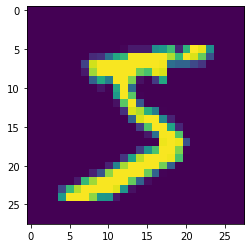

    Label: 5




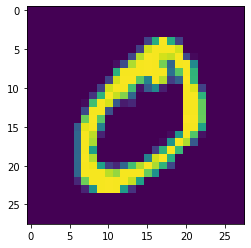

    Label: 0




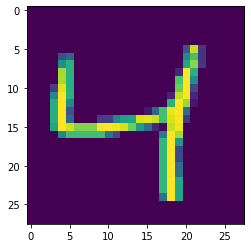

    Label: 4




In [3]:
# Check data
for i in range(3):
    plot_img(images[i])
    print(f"    Label: {labels[i]}\n\n")

## 2. Train Single Layer Neural Network


In [4]:
def predict(input_, weights):
    assert input_.shape[1] == weights.shape[0]
    pred = input_.dot(weights)
    
    return pred


# Initialize random weights
alpha = 0.1
weights = np.random.rand(784, 10)
true = labels

total_errors = []
for j in range(10):
    for i in range(len(images)):

        # Prepare input, goal
        input_ = np.array(images[i])
        input_ = input_ / np.linalg.norm(input_)  # normalize input
        input_.shape = (1, 784) 

        true = np.zeros(10)
        true[labels[i]] = 1
        true.shape = (1, 10)

        # Predict
        pred = predict(input_, weights)

        # Compare
        assert true.shape == pred.shape
        deltas = pred - true
        total_error = sum(deltas.dot(deltas.T))
        total_errors.append(total_error[0])  # Record error
        delta_weights = (deltas.T.dot(input_)).T

        # Update
        weights = weights - alpha * delta_weights    

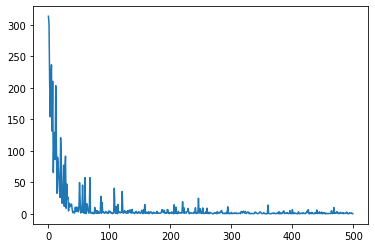

In [5]:
import matplotlib.pyplot as plt

#total_errors
steps = [i for i in range(len(total_errors))]
plt.plot(steps[:500], total_errors[:500])

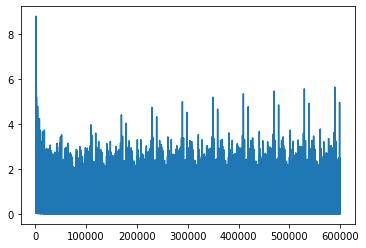

In [6]:
plt.plot(steps[1000:], total_errors[1000:])

## 3. Test on Training Data

In [7]:
def label_prediction(predict):
    ones = np.ones(10)
    ones.shape = (1, 10)
    return np.argmin(ones - predict)

#### 3.1 Random weights

In [8]:
random_weights = weights.copy()
np.random.shuffle(random_weights)

hit = 0
first_n = len(images)
for i in range(first_n):
    input_ = np.array(images[i])
    input_ = input_ / np.linalg.norm(input_)
    input_.shape = (1, 784) 
    
    if labels[i] == label_prediction(predict(input_, random_weights)):
        hit += 1

print(f"Accuracy: {hit /first_n}")

Accuracy: 0.087


#### 3.2 Trained weights

In [9]:
hit = 0
first_n = len(images)
for i in range(first_n):
    input_ = np.array(images[i])
    input_ = input_ / np.linalg.norm(input_)
    input_.shape = (1, 784) 
    
    if labels[i] == label_prediction(predict(input_, weights)):
        hit += 1

print(f"Accuracy: {hit /first_n}")

Accuracy: 0.8183333333333334


## 4. Test on Testing Data

In [10]:
# Load MNIST data
mndata = MNIST('data/')
images, labels = mndata.load_testing()

#### 4.1 Random Weights

In [11]:
hit = 0
first_n = len(images)
for i in range(first_n):
    input_ = np.array(images[i])
    input_ = input_ / np.linalg.norm(input_)
    input_.shape = (1, 784) 
    
    if labels[i] == label_prediction(predict(input_, random_weights)):
        hit += 1

print(f"Accuracy: {hit /first_n}")

Accuracy: 0.084


#### 4.2 Trained weights

In [12]:
hit = 0
first_n = len(images)
for i in range(first_n):
    input_ = np.array(images[i])
    input_ = input_ / np.linalg.norm(input_)
    input_.shape = (1, 784) 
    
    if labels[i] == label_prediction(predict(input_, weights)):
        hit += 1

print(f"Accuracy: {hit /first_n}")

Accuracy: 0.8198
